# Local Age vs Host Stellar Mass

This plot will look at the prediction made in Childress 2014 figure 4.

In [1]:
from glob import glob
import datetime

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('talk')
from scipy.stats import spearmanr

## Verrify
Check to make sure stellar mass is some what related to my c paramter.

## Age v Host Mass

In [26]:
galaxy = pd.read_csv('../resources/kcorrect_stellarmass.csv',  usecols=['GAL', 'redshift', 'stellarmass'], index_col='GAL')
galaxy = galaxy[galaxy['redshift']<0.2]
galaxy

,redshift,stellarmass
GAL,,
10028,0.065329,2.959660e+10
1032,0.129755,2.856640e+10
10805,0.045363,8.579470e+09
11172,0.136222,1.522050e+10
12860,0.121708,1.971160e+10
12898,0.083581,5.865850e+09
12950,0.082657,5.773250e+09
13135,0.104671,7.216360e+10
13354,0.157625,2.170690e+10


In [41]:
age_local = pd.read_csv('../resources/ages_campbell.tsv', sep='\t',  skiprows=[1],
                   usecols=['# sn id', 'age'], dtype={'age': np.float64, '# sn id': np.int})
age_local.rename(columns={'# sn id': 'SNID'}, inplace=True)
age_local.set_index('SNID', inplace=True)
age_local

,age
SNID,
10028,6.343210
10324,3.951807
1032,6.117300
10550,2.510263
10559,5.349814
10805,4.566090
11172,5.167015
1119,2.563700
11311,4.269606


## Get Median ages

These are not great age estimates. The distributions are more complex than this.

In [ ]:
age_global = pd.read_csv('../resources/ages_campbellG.tsv', sep='\t',  skiprows=[1],
                   usecols=['# sn id', 'age'], dtype={'age': np.float64, '# sn id': np.int})
age_global.rename(columns={'# sn id': 'SNID'}, inplace=True)
age_global.set_index('SNID', inplace=True)
age_global

In [78]:
# data = pd.merge(galaxy, age, how='outer', on='index')
data_local = pd.concat([galaxy, age_local], axis=1)
data_local.dropna(inplace=True)
data_local

,redshift,stellarmass,age
1032,0.129755,2.856640e+10,6.117300
1371,0.119015,4.658690e+10,9.597481
1794,0.142767,6.920300e+08,3.807323
2372,0.180438,1.776030e+10,6.133763
2440,0.191126,1.826730e+10,4.090401
3087,0.165494,4.940910e+09,2.667006
3205,0.147577,2.007040e+10,3.087827
3256,0.108243,5.794120e+09,2.508225
3317,0.161011,9.537400e+09,6.903716
3592,0.086610,3.235730e+08,3.736866


In [ ]:
data_global = pd.concat([galaxy, age_global], axis=1)
data_global.dropna(inplace=True)
data_global

### Alternative way to get ages

In [3]:
# number of samples desired
num = 100

In [57]:
# dataset = 'campbell'
dataset = 'campbellG'

In [58]:
# test= pd.concat([SNData, ages], axis=1)  ## ages dataframe is going away
test = galaxy.copy()
test.dropna(inplace=True)  # drop rows that don't hae both HR & ages
for i in range(num):
    test['random age {}'.format(i)] = np.nan
# test.head(5)
test

,redshift,stellarmass,random age 0,random age 1,random age 2,random age 3,random age 4,random age 5,random age 6,random age 7,...,random age 90,random age 91,random age 92,random age 93,random age 94,random age 95,random age 96,random age 97,random age 98,random age 99
GAL,,,,,,,,,,,,,,,,,,,,,
10028,0.065329,2.959660e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1032,0.129755,2.856640e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10805,0.045363,8.579470e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11172,0.136222,1.522050e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12860,0.121708,1.971160e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12898,0.083581,5.865850e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12950,0.082657,5.773250e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13135,0.104671,7.216360e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13354,0.157625,2.170690e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
np.random.seed(1378052)   #set a seed for reproducibility

if dataset == 'campbell':
    files = '../resources/SN{}_campbell_chain.tsv'
if dataset == 'campbellG':
    files = '../resources/SN{}_campbellG_chain.tsv'

# for i in SNData.index.values:
for i in test.index.values:
    # So this works with only a partical dataset
    try:
        ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
                            usecols=['age'], dtype={'age': np.float64})
        # Get 10 random values of ages_
        # Use randint because it is half open: [low, high)
        # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
        # Unlike random_integer
        index=np.random.randint(len(ages_), size=num)
        # add the randomly collected ages to the dataframe.
        # `.loc` allows access to the `num` random age "cells"
        # `.values` takes the ages_ from a series to a array
        # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
        test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
    except FileNotFoundError:
        # if data file is not there do nothing
        print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# remove rows where no age was added
# should be a result of hitting the except block.
test.dropna(inplace=True)        

print(test.head(5))


#-----------#


# make sure you add the dtype, or else the regression plots do not work
plot = pd.DataFrame(columns=['stellarmass', 'age'], dtype=np.float64)
plot.loc[0] = 1

for index in range(len(test)):
    for num_ in range(num):
# test.loc[index+1, 'random age {}'.format(num_)]
        # add a small bit of noice on the HR to let the linear fitting work.
        # this remvoes the fact that so many have the SAME HR.
        # change error propogation because the error is in log space
        plot.loc[index*num+num_, ['stellarmass', 'age']] = [test.iloc[index]['stellarmass']*(10**(0.3*np.random.randn(1)[0])),
                                                   test.iloc[index]['random age {}'.format(num_)]]
#         print(plot[index*num_+num_, ['hr', 'age']])
#         plot.loc[index_*num_+num_, ['hr', 'age']] = test[index, 'random age {}'.format(num_)]

print(plot.head(5))





# if dataset == 'campbell':
#     files = '../resources/SN{}_campbell_chain.tsv'
# if dataset == 'campbellG':
#     files = '../resources/SN{}_campbellG_chain.tsv'

# # for i in SNData.index.values:
# for i in test.index.values:
#     # So this works with only a partical dataset
#     try:
#         ages_ = pd.read_csv(files.format(i), sep='\t', skiprows=[1],
#                             usecols=['age'], dtype={'age': np.float64})
#         # Get 10 random values of ages_
#         # Use randint because it is half open: [low, high)
#         # https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html
#         # Unlike random_integer
#         index=np.random.randint(len(ages_), size=num)
#         # add the randomly collected ages to the dataframe.
#         # `.loc` allows access to the `num` random age "cells"
#         # `.values` takes the ages_ from a series to a array
#         # `.reshape` takes the (`num`,1) column array and makes it a horizontal array
#         test.loc[i, 'random age 0':'random age {}'.format(num-1)] = ages_.values[index].reshape(num)
#     except FileNotFoundError:
#         # if data file is not there do nothing
#         print(f'Skipping SN{i} becuase {files.format(i)} is not present')

# # remove rows where no age was added
# # should be a result of hitting the except block.
# test.dropna(inplace=True)        

# print(len(test))   #should be 110
# test.head(5)

       redshift   stellarmass  random age 0  random age 1  random age 2  \
GAL                                                                       
10028  0.065329  2.959660e+10      7.244177      5.157825      7.946347   
1032   0.129755  2.856640e+10      1.425441     10.741009     10.785114   
10805  0.045363  8.579470e+09      1.489724      5.442763      1.569666   
11172  0.136222  1.522050e+10      4.707475      4.139456      4.482811   
12860  0.121708  1.971160e+10      7.932894      6.203280      8.347942   

       random age 3  random age 4  random age 5  random age 6  random age 7  \
GAL                                                                           
10028      6.516907      6.728980      7.550968      5.629941      6.193037   
1032       2.422833      8.955518      0.786787     10.647084      3.098108   
10805      1.311527      3.248172      3.838978      3.576871      5.223713   
11172      4.015837      3.232215      4.085376      3.537389      3.780070   


## Make plots

First quick and dirty, than a kde

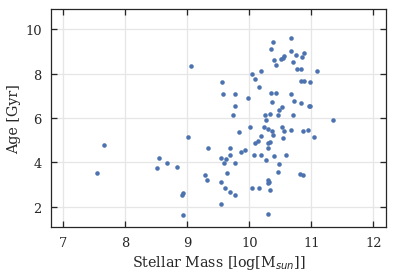

In [190]:
sns.set(context='talk', style='ticks', palette='deep', 
        font='serif', font_scale=1, color_codes=True)

fig = plt.figure()
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(6.8,12.2)
plt.ylim(1.1, 10.9)
ax = plt.gca()  # very helpful
ax.get_yaxis().set_tick_params(direction='in', top='on')
ax.get_xaxis().set_tick_params(direction='in', right='on')
ax.set_axisbelow(True)   # moves axis beind values, maybe
plt.xlabel(r'Stellar Mass [log[M$_{sun}$]]')
plt.ylabel(r'Age [Gyr]')
plt.grid(which='major', color='0.90', linestyle='-')
# fig.set_tight_layout({'pad': 1.5})
plt.show()

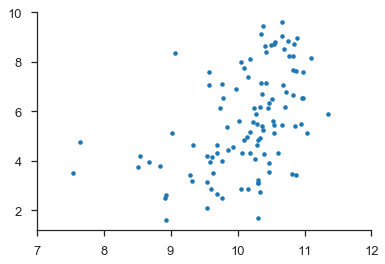

In [131]:
sns.set_style('ticks')
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(7,12)
sns.despine()
plt.show()

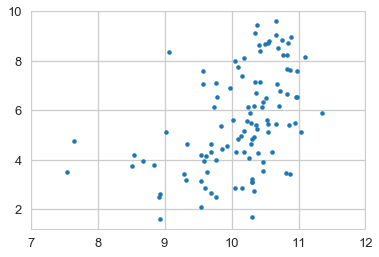

In [118]:
sns.set_style('whitegrid')
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(7,12)
plt.show()

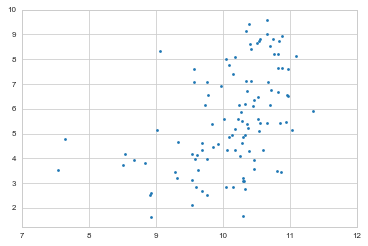

In [132]:
sns.set_style('whitegrid')
sns.set_context('paper')
plt.plot(np.log10(data['stellarmass'].values), data['age'].values, '.')
plt.xlim(7,12)
plt.show()

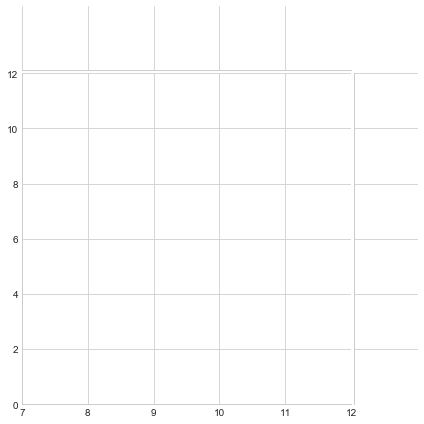

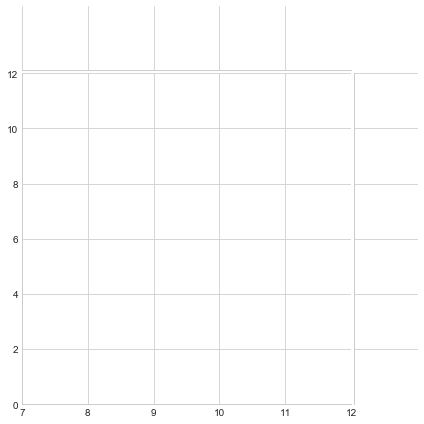

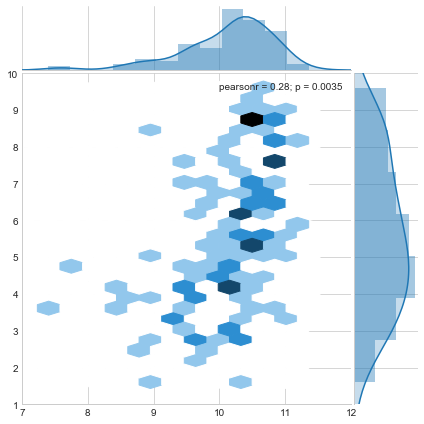

In [95]:
sns.jointplot(np.log10(data['stellarmass'].values), data['age'].values, kind="hex", gridsize=25,
                  bins=None, space=0.05, xlim=(7,12),  ylim=(1,10), #ylim=(-0.75, 1.4),
                  marginal_kws={'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )
# sns.jointplot(np.log10(data['stellarmass'].values), data['age'].values, kind="kde",
#               stat_func=None, levels=3,
#               space=0.05, xlim=(7,12),  ylim=(0,12), #ylim=(-0.75, 1.4),
# #               marginal_kws={'kde':True, 'hist':True,
# #                             'kde_kws':{"shade":True}}
#                  ).set_axis_labels('Galaxy Stellar Mass [log(M/M$_{\odot}$)]', 
#                                    'local age [Gyr]')
plt.show()

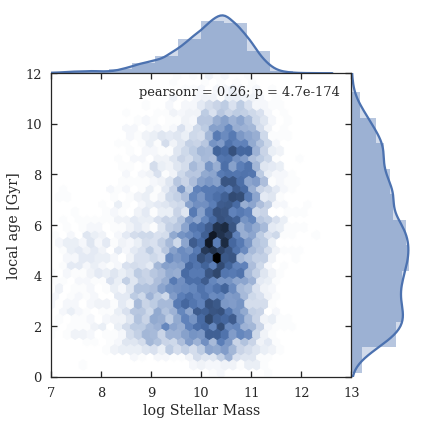

In [41]:
sns.set(context='talk', style='ticks', font='serif', color_codes=True)

g = sns.jointplot(np.log10(plot['stellarmass'].values), plot['age'].values, kind="hex", 
                  gridsize=35, bins=None,
                  space=0.0, xlim=(7,13),  ylim=(0,12), #ylim=(-0.75, 1.4),
                  marginal_kws={'bins':12, 'kde':True, 'hist':True,
                                'kde_kws':{"shade":True}}
                 )
# sns.jointplot(np.log10(data['stellarmass'].values), data['age'].values, kind="kde",
#               stat_func=None, levels=3,
#               space=0.05, xlim=(7,12),  ylim=(0,12), #ylim=(-0.75, 1.4),
# #               marginal_kws={'kde':True, 'hist':True,
# #                             'kde_kws':{"shade":True}}
#                  ).set_axis_labels('Galaxy Stellar Mass [log(M/M$_{\odot}$)]', 
#                                    'local age [Gyr]')

g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible

g = g.set_axis_labels('log Stellar Mass', 'local age [Gyr]')

# g.savefig(savename)
plt.show()

In [16]:
min(np.log10(plot['stellarmass'].values))

1.9668298927455905

In [17]:
max(np.log10(plot['stellarmass'].values))

12.288872122732558

In [34]:
plot['stellarmass'].describe()

count    1.100000e+04
mean     3.763786e+10
std      6.291330e+10
min      5.963999e+06
25%      5.647263e+09
50%      1.831272e+10
75%      4.534502e+10
max      1.944787e+12
Name: stellarmass, dtype: float64

In [29]:
galaxy['stellarmass'].describe()

count    1.100000e+02
mean     3.019712e+10
std      3.445990e+10
min      3.521470e+07
25%      5.778468e+09
50%      2.017830e+10
75%      3.881015e+10
max      2.267200e+11
Name: stellarmass, dtype: float64

In [24]:
galaxy[galaxy['stellarmass'] < 1*10**6]

,redshift,stellarmass
GAL,,
15483,0.0,592.609


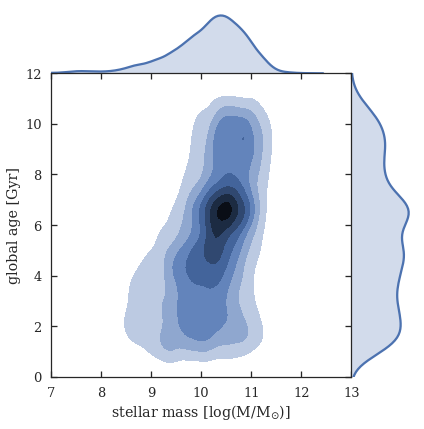

In [61]:
g = sns.jointplot(np.log10(plot['stellarmass'].values), plot['age'].values, kind="kde",
                  space=0.0, xlim=(7,13),  ylim=(0,12),
                  shade_lowest=False,
                  n=3  #number of levels to be passed to plt.contour
                 )

g = g.annotate(spearmanr, template="")  # remove 

g.ax_joint.tick_params(axis='both', direction='in')
g.ax_joint.set_axisbelow(False)    # bring axis to be ontop of hexbin so that the tick marks are visible

g = g.set_axis_labels('stellar mass [log(M/M$_{\odot}$)]', 'global age [Gyr]')

g.savefig('AgevMass-global.pdf')
plt.show()